参考：https://signate.jp/competitions/284/discussions/tiff-1  
データ：https://signate.jp/competitions/284/data

In [1]:
import json
import pickle

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tifffile
from tqdm.auto import tqdm

In [2]:
# データの読み込み
idx = 15
data = tifffile.imread(f'input/train_images/train_{idx:02d}.tif')
with open(f"input/train_annotations/train_{idx:02d}.json", "r") as fp:
    annotation = json.load(fp)

In [3]:
# データの型、サイズ
type(data), data.shape

(numpy.ndarray, (9411, 5411))

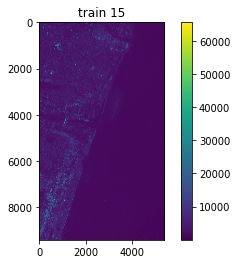

In [4]:
# プロット
plt.title(f"train {idx:02d}")
plt.imshow(data)
plt.colorbar()
plt.show()

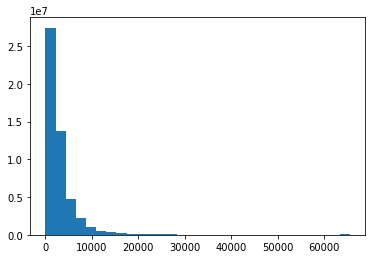

In [5]:
# 輝度のヒストグラム
plt.hist(data.flatten(), bins=30)
plt.show()

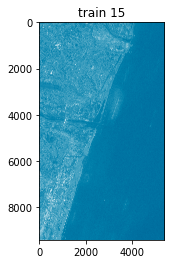

In [6]:
# ログスケールでの可視化
plt.title(f"train {idx:02d}")
plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
plt.show()

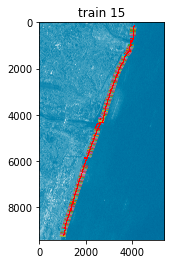

In [7]:
# annotationデータのプロット
plt.title(f"train {idx:02d}")
plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
for line in annotation['validate_lines']:
    ix = [line[i][0] for i in range(2)]
    iy = [line[i][1] for i in range(2)]
    plt.plot(ix, iy)
for point in annotation['coastline_points']:
    plt.plot(point[0], point[1], ",", color="red")
plt.show()

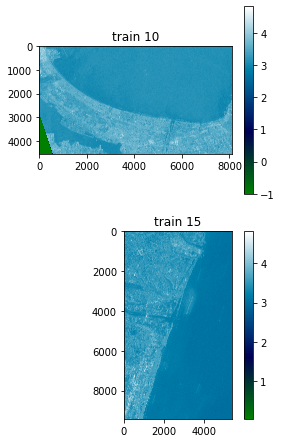

In [8]:
# trainデータ全体の可視化
plt.figure(figsize=(5*5,5*4))
for idx in [10, 15]:
    plt.subplot(5,5,idx+1)
    plt.title(f"train {idx:02d}")
    data = tifffile.imread(f'input/train_images/train_{idx:02d}.tif')
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    plt.colorbar()
plt.savefig("output/train/image.png")
plt.show()

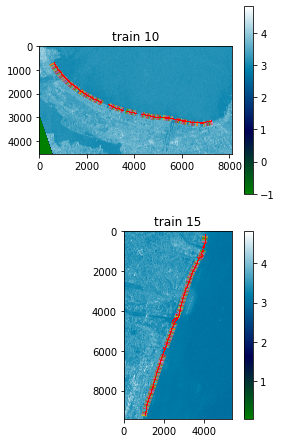

In [9]:
# trainデータ全体の可視化
plt.figure(figsize=(5*5,5*4))
for idx in [10, 15]:
    plt.subplot(5,5,idx+1)
    plt.title(f"train {idx:02d}")
    data = tifffile.imread(f'input/train_images/train_{idx:02d}.tif')
    with open(f"input/train_annotations/train_{idx:02d}.json", "r") as fp:
        annotation = json.load(fp)
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    for line in annotation['validate_lines']:
        ix = [line[i][0] for i in range(2)]
        iy = [line[i][1] for i in range(2)]
        plt.plot(ix, iy)
    for point in annotation['coastline_points']:
        plt.plot(point[0], point[1], ",", color="red")
    plt.colorbar()
plt.savefig("output/train/image_w_annotate.png")
plt.show()

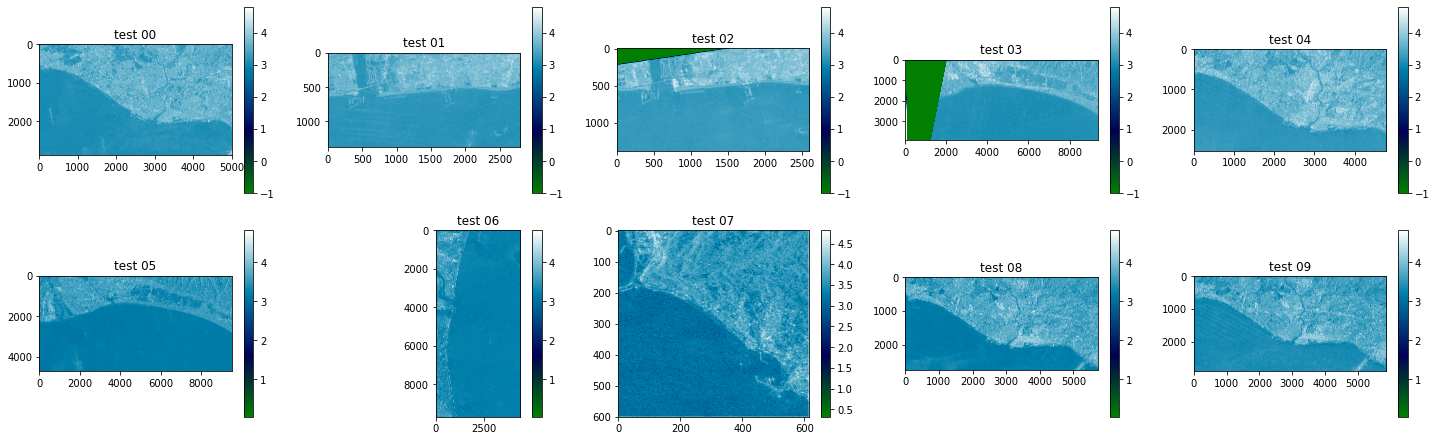

In [10]:
# testデータ全体の可視化
plt.figure(figsize=(5*5,6*4))
for idx in range(10):
    plt.subplot(6,5,idx+1)
    plt.title(f"test {idx:02d}")
    data = tifffile.imread(f'input/test_images/test_{idx:02d}.tif')
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    plt.colorbar()
plt.savefig("output/test/image_w_annotate.png")
plt.show()